In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
plt.ion()


## Lets solve the *Heat Equation*
$$\frac{\partial^2 T}{\partial t^2}= \alpha \nabla^2T$$
Using the standard finit difference method
- Replace all derivates in the PDE by DQs
- solve the resulting linear system

### No Matrix $A$
Acturally we don't have to construct the coeffitiant matrix $A$. We can use pretent that the QDs
form the rhs of an ODE system.
We ,make a function witch returns the rhs of the ode system for the heat equation simulation using the FDM.
It takes a wire_length, and the second derivate $\frac{\partial^2T}{\partial x^2}$ on both ends of the wire.

In [2]:
def make_rhs(wire_length, alpha, d2Tdx2_start, d2Tdx2_end):
    def rhs(T, t):
        h_squared = (wire_length/T.size)**2
        d2Tdx2 = np.append(np.append(d2Tdx2_start, (T[:-2] - 2.0*T[1:-1] + T[2:])/h_squared), d2Tdx2_end)
        dTdt = alpha*d2Tdx2
        return dTdt
    return rhs

Makes an array of the inital temperature values using a bell function $h \exp(-s x^2)$.

In [3]:
def make_initial_wire(grid_size, spread, height):
    xs = np.linspace(-1., 1., grid_size)
    T = height*np.exp(-spread*xs**2)
    return T

Solves the Heat Equation using the FDM.

In [4]:
def run_simulation(wire_length=1., alpha=0.01, d2Tdx2_start=0., d2Tdx2_end=0., 
                    grid_size=100, spread=1.0, height=1.0,
                   time=10.0, steps=1000):
    rhs = make_rhs(wire_length=wire_length, alpha=alpha, d2Tdx2_start=d2Tdx2_start, d2Tdx2_end=d2Tdx2_end)
    wire = make_initial_wire(grid_size=grid_size, spread=spread, height=height)
    ts = np.linspace(0, time, steps)
    return odeint(rhs, wire, ts)

In [5]:
ans = run_simulation()

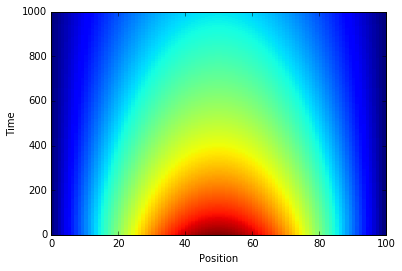

In [6]:
plt.pcolormesh(ans)
plt.xlabel("Position")
plt.ylabel("Time")